# Data

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_wine = pd.read_csv('white_wine.csv')

In [ ]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


PREPROCESS

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


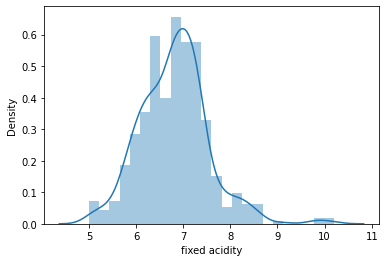

In [ ]:
sns.distplot(df_wine['fixed acidity'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


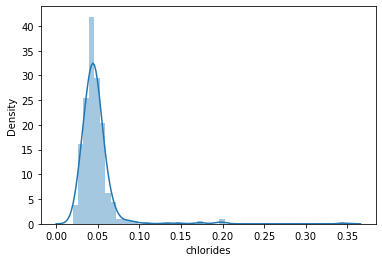

In [ ]:
sns.distplot(df_wine['chlorides'])

In [ ]:
def binning_acidity(value):

  if value > 8:
    result = 'high'
  elif value > 6.5:
    result = 'medium'
  else:
    result = 'low'

  return result

def binning_chlorides(value):

  if value > 0.07:
    result = 'high'
  elif value > 0.05:
    result = 'medium'
  else:
    result = 'low'

  return result

def labeling(value):

  if value > 6:
    result = 1
  else:
    result = 0

  return result 

df_wine['fixed acidity level'] = df_wine['fixed acidity'].apply(binning_acidity)
df_wine['chlorides level'] = df_wine['chlorides'].apply(binning_chlorides)
df_wine['label'] = df_wine['quality'].apply(labeling)

In [ ]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
fixed acidity level     0
chlorides level         0
label                   0
dtype: int64

In [ ]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity level,chlorides level,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,medium,low,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,low,low,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,high,low,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,medium,medium,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,medium,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0,low,medium,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0,medium,medium,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0,medium,low,0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0,low,low,0


In [ ]:
df_wine['alcohol'].fillna(df_wine['alcohol'].mean(), inplace = True)

In [ ]:
df_wine_deploy = df_wine[['alcohol','density','fixed acidity level','chlorides level','label']]
wine_train = df_wine_deploy[:400]
wine_test = df_wine_deploy[400:]

In [ ]:
wine_train.to_csv('wine_train.csv', index = False)
wine_test.to_csv('wine_test.csv', index = False)

In [ ]:
wine_train = pd.read_csv('wine_train.csv')
wine_train

,alcohol,density,fixed acidity level,chlorides level,label
0,8.8,1.0010,medium,low,0
1,9.5,0.9940,low,low,0
2,10.1,0.9951,high,low,0
3,9.9,0.9956,medium,medium,0
4,9.9,0.9956,medium,medium,0
...,...,...,...,...,...
395,10.0,0.9920,medium,low,0
396,11.4,0.9917,high,low,0
397,11.4,0.9917,low,low,0
398,9.4,0.9993,low,low,0


# Additional Liblary

In [ ]:
# !pip install category_encoders

# Model Training

In [ ]:
# Basic Operations
import pandas as pd
import numpy as np

# ML Models
from sklearn.linear_model import LogisticRegression

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Model
import pickle
import joblib

# data
wine_train = pd.read_csv('wine_train.csv')

# preprocess
poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False)
one_hot = OneHotEncoder(drop = 'first')

transformer = ColumnTransformer([
                                 ('poly',poly,['alcohol','density']),
                                 ('one_hot',one_hot,['fixed acidity level','chlorides level'])
                                ])
# Data Splitting
X = wine_train.drop(columns = 'label')
y = wine_train['label']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    random_state = 2020)

# Model Selection
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

hyperparam_space = {
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear','newton-cg']
}

skfold = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('poly',
                                                                         PolynomialFeatures(degree=3,
                                                                                            include_bias=False,
                                                                                            interaction_only=False,
                                                                      

# Prediction : Pickle

In [ ]:
# Model Pickling
grid_search.best_estimator_.fit(X,y) # FINAL MODEL
filename = 'Model Final.sav'
pickle.dump(grid_search.best_estimator_,open(filename,'wb'))

# load dataset
wine_test = pd.read_csv('wine_test.csv')

# load model
filename = 'Model Final.sav'
loaded_model = pickle.load(open(filename,'rb'))

> ## Predict Test Dataset

In [ ]:
loaded_model.predict(wine_test)

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
loaded_model.predict(wine_test[0:1])

/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


array([0])

> ## Predict an Observation

In [ ]:
df_predict = pd.DataFrame({
    'alcohol':[10],
    'density':[0.999],
    'fixed acidity level':['high'],
    'chlorides level':['low']
})

print('predict class :',loaded_model.predict(df_predict))
print('predict proba :',loaded_model.predict_proba(df_predict))

predict class : [0]
predict proba : [[0.68667906 0.31332094]]


# Prediction : Joblib

In [ ]:
# saving model
joblib.dump(grid_search.best_estimator_, "model joblib")

# loading model
model_joblib = joblib.load("model joblib")

> ## Predict an Observation

In [ ]:
df_predict = pd.DataFrame({
    'alcohol':[10],
    'density':[0.999],
    'fixed acidity level':['high'],
    'chlorides level':['low']
})

print('predict class :',model_joblib.predict(df_predict))
print('predict proba :',model_joblib.predict_proba(df_predict))

predict class : [0]
predict proba : [[0.68667906 0.31332094]]
